<a href="https://colab.research.google.com/github/FangmingXie/collab-workshop-st/blob/main/hw/hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 
### Spatial transcriptomics workshop -- UCLA Collaboratory
Dataset:
Vizgen Data Release V1.0. May 2021

### Instructions for setting up:
- Prior to running this notebook, download the data using this link:
https://drive.google.com/file/d/1zUHtd171abXdFfrVIsdzq2_R92jpIoQr/view?usp=sharing
- And upload the file to the Google Colab using the side bar on the left.
- You should be able to run through this notebook without changing *anything*.

### Your tasks:
- Please complete the `Your tasks` section at the end of this notebook.
- Please send a screenshot of your results (your plot and your descriptions) to Fangming Xie (fmxie@ucla.edu). 

### Estimated time:
- This homework should take less than 30 minutes to complete. If you have spent more than 1 hour, please email the instructor Fangming Xie (fmxie@ucla.edu) to get help.

# Setting up



In [ ]:
# Install and import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('talk')

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [ ]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
  """ rotate data points defined by `x` and `y` by `theta` degree
  """
  a = np.vstack([x,y]).T
  if unit == 'degree':
    theta = theta*np.pi/180 # convert to radian

  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  ar = a.dot(R.T)
  return ar[:,0], ar[:,1]

def st_scatter(x, y, gexp=None, vmax_p=98, title='', s=1):
  """customized scatter plot -- yesterday's progress
  """

  fig, ax = plt.subplots(figsize=(10,8))
  if gexp is not None:
    vmax = np.percentile(gexp, vmax_p)
    g = ax.scatter(x, y, c=gexp, s=s, edgecolor='none', vmax=vmax)
    fig.colorbar(g, label='log10(1+count)', shrink=0.3)
  else:
    g = ax.scatter(x, y, s=s, edgecolor='none')

  ax.set_title(title)
  ax.set_aspect('equal')

  return 

In [ ]:
f = '/content/vizgen_mouse_brain_S2R2.csv.gz'
data = pd.read_csv(f, index_col=0)
data

,x,y,Oxgr1,Htr1a,Htr1b,Htr1d,Htr1f,Htr2a,Htr2b,Htr2c,...,Pdgfrb,Ptk7,Ret,Ror1,Ror2,Ros1,Ryk,Tek,Tie1,Tyro3
0,594.918018,5628.150243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0
1,576.450018,5762.286246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,0.0,1.0,4.0,0.0,3.0,0.0,0.0,0.0
2,564.462017,5721.624245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,538.164017,5605.475642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,610.362018,5652.936244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84167,9235.566329,3349.566107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
84168,9225.738329,3261.654105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0
84169,9230.976329,3287.358106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
84170,9236.754329,3364.956108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
x = data['x'].values
y = data['y'].values
theta = 40
xr, yr = rot2d(x, y, theta)

# Example code that you want to borrow below

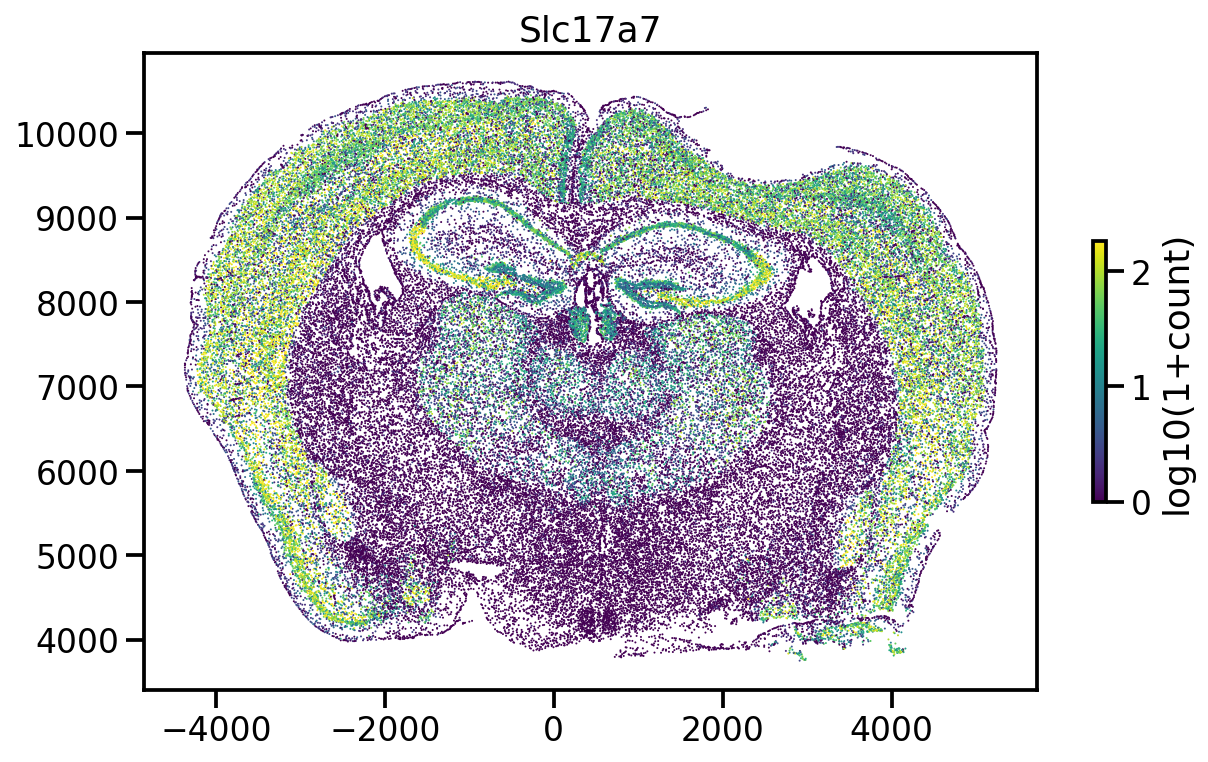

In [ ]:
gene_name = 'Slc17a7'
gexp = np.log10(1+data[gene_name])

st_scatter(xr, yr, gexp, title=gene_name)

# Your tasks:
1. Make a plot like the one above (the `Slc17a7` gene spatial distribution), but use a different gene in the data table. You may copy and modify the code from above.

2. Describe the plot you made, including what the pattern looks like and what might be interesting to readers of your plot. Please be very brief and use no more than 3 sentences.

In [ ]:
# task 1: repeat the plot above but using a different gene

In [ ]:
# task 2: your comments